Prvi del najinega projekta

In [3]:
import random
import sage.graphs.graph_plot
from sage.graphs.base.boost_graph import *
import numpy

Funkcija, ki nam vrne c-je kot seznam seznamov

In [4]:
def seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena):
    sur_podatki = []
    for i in range(0, st_opazanj):
        mer_povezav = []
        for j in range(0, st_pov_grafa):
            mer_povezav.append(random.randint(min_cena, max_cena))
        sur_podatki.append(mer_povezav)
    return(sur_podatki)

Funkcija, ki nam zmnoži vektor z transponiranim vektorjem

In [5]:
def mnoz(vektor1, vektor2):
    matrika = []
    for i in range(0,len(vektor1)):
        vrstica =[]
        for j in range(0, len(vektor2)):
            vrstica.append(vektor1[i] * vektor2[j])
        matrika.append(vrstica)
    return(matrika)

Kovariancna matrika

In [7]:
def kov_matrika(vse_utezi):
    avr_pov = [i * 1/len(vse_utezi) for i in [sum(x) for x in zip(*vse_utezi)]]
    zac_mat = numpy.matrix(mnoz(numpy.subtract(vse_utezi[0],avr_pov),numpy.subtract(vse_utezi[0],avr_pov)))
    for i in range(1, len(vse_utezi)):
        zac_mat += numpy.matrix(mnoz(numpy.subtract(vse_utezi[i],avr_pov),numpy.subtract(vse_utezi[i],avr_pov)))
    kon_mat = 1/len(vse_utezi)*zac_mat
    return(kon_mat)

#diagonala:
#numpy.diag(testna_kov_mat)


Generiramo sosednosti (vozlišča za graf)

In [31]:
def nakljucno_vozlisce(st_vozlisc1):
    start = random.randint(0, st_vozlisc1)
    end = random.randint(0,st_vozlisc1)
    if start == end:
        return nakljucno_vozlisce(st_vozlisc1)
    else:
        return[start, end]

#nakljucno_vozlisce(ggrafi[8])

def vsa_vozlisca(koliko, st_pov1):
    vozlisca = []
    for i in range(0, st_pov1):
        x = nakljucno_vozlisce(koliko)
        while x in vozlisca:
            x = nakljucno_vozlisce(koliko)
        vozlisca.append(x)
    return vozlisca

Generiramo naključen graf:

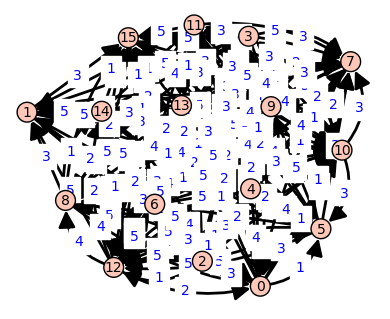

In [33]:
def graf(st_opazanj, st_vozlisc, st_pov_grafa, min_cena, max_cena):
    utezi2 = seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena)
    #graf_seznam = graphs.RandomGNM(st_vozlisc, st_pov_grafa).edges(labels=False)
    graf_seznam =  vsa_vozlisca(st_vozlisc, st_pov_grafa)
    nov = [] #najprej spremeniva v list
    for i in range(0,len(graf_seznam)):
        nov.append(list(graf_seznam[i]))
    konec = [] #dodava še ceno, v obliki ki jo sprjema digraph
    seznam_gra = []
    for j in range(0,len(utezi2)):
        zadnji = []
        for i in range(0,len(nov)):
            vmesni = []
            vmesni.append(nov[i][0])
            vmesni.append(nov[i][1])
            vmesni.append(utezi2[j][i])
            zadnji.append(tuple(vmesni))
        konec.append(zadnji)
        gr = DiGraph(zadnji)
        seznam_gra.append(gr)
    #seznam_gra[0].show(edge_labels = True)
    return(seznam_gra, konec)

((graf(5, 15, 150, 1, 5))[0][0]).show(edge_labels = True)

Vektorji poti x

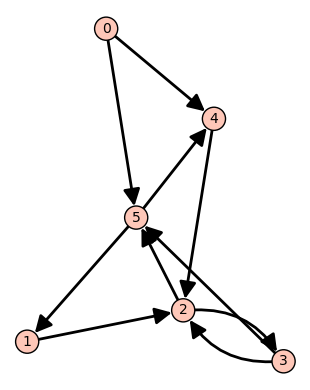

[[0, 0, 0, 1, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 1]]

In [35]:
def vektorcki_x(graf, zacetno, koncno):
    vse_poti = graf.all_paths(zacetno, koncno, use_multiedges=True, report_edges=False, labels=False)
    vse_povezave = graf.edges()
    par = []
    for i in range(0,len(vse_povezave)):
        par.append(vse_povezave[i][0:2])
    seznam_vektorjev = []
    for i in range(0, len(vse_poti)):
        pot = (vse_poti[i])
        prvi_oklepaj1 = list(zip(pot, pot[1:] + pot[:1]))
        prvi_oklepaj = prvi_oklepaj1[:-1]
        x=[]
        for i in range(0, len(par)):
            if par[i] in prvi_oklepaj:
                x.append(1)
            else:
                x.append(0)
        seznam_vektorjev.append(x)
    return(seznam_vektorjev)

x = ((graf(5, 5, 10, 1, 5))[0][0])
x.show()
vektorcki_x(x, 2, 4)

In [0]:
Izračunamo ceno določene poti

In [10]:
def povprecje(cene1):
    seznam_cen = list(cene1.values())
    povprecne_cene = []
    for i in range(0, len(seznam_cen)):
        povprecne_cene.append(numpy.average(seznam_cen[i]))
    return(povprecne_cene)


def vektor_skalarni_produkt(cene1, start, end, graf):
    cene_poti = {}
    for i in range(0,len(cene1)):
        x = vektorcki_x(graf[0], start, end)
        vmesni = []
        for j in range(0,len(x)):
            vmesni.append(numpy.dot(cene[i], x[j]))
        cene_poti[i] = vmesni
    return


